<a href="https://colab.research.google.com/github/prawizard/TweetsClassification_NLP/blob/main/NaiiveBayes/Irony_TweetEval_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import f1_score
import re
import requests

# Constants

In [ ]:
TRAIN_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_text.txt"
TRAIN_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_labels.txt"
VAL_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_text.txt"
VAL_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_labels.txt"
TEST_TEXT_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_text.txt"
TEST_LABELS_URL="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_labels.txt"
VOCAB_SIZE=2000
LAPLACE_CONST=0.3

#Access Data from the Files

In [ ]:
r = requests.get(TRAIN_TEXT_URL, allow_redirects=True)
open('train_text.txt', 'wb').write(r.content)

r = requests.get(TRAIN_LABELS_URL, allow_redirects=True)
open('train_labels.txt', 'wb').write(r.content)

r = requests.get(VAL_TEXT_URL, allow_redirects=True)
open('val_text.txt', 'wb').write(r.content)

r = requests.get(VAL_LABELS_URL, allow_redirects=True)
open('val_labels.txt', 'wb').write(r.content)

r = requests.get(TEST_TEXT_URL, allow_redirects=True)
open('test_text.txt', 'wb').write(r.content)

r = requests.get(TEST_LABELS_URL, allow_redirects=True)
open('test_labels.txt', 'wb').write(r.content)

1568

In [ ]:
# temki = urllib.request.urlopen(TARGET_URL)
# type(temki)
# import requests

# response = requests.get(TARGET_URL)
# data = response.text
# type(data)
# data[1]
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()

val_stream=open("val_text.txt")
val_tweets=val_stream.readlines()
val_stream.close()

test_stream=open("test_text.txt")
test_tweets=test_stream.readlines()
test_stream.close()


In [ ]:
print(len(tweets), len(val_tweets))

2862 955


In [ ]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    tweets[i]=re.sub('@user', '', tweets[i])

for i in range(len(val_tweets)):
  if val_tweets[i].find('@user')!=-1:
    val_tweets[i]=re.sub('@user', '', val_tweets[i])

for i in range(len(test_tweets)):
  if test_tweets[i].find('@user')!=-1:
    test_tweets[i]=re.sub('@user', '', test_tweets[i])
# tweets    
# Words like effing converted to VetsResistSquadron

In [ ]:
# tweetStrings = [ tw for tw in tweetStrings if tw!='' and tw!=' '] 

In [ ]:
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()

val_stream=open("val_labels.txt")
val_tweetsLabels=val_stream.readlines()
val_stream.close()

test_stream=open("test_labels.txt")
test_tweetsLabels=test_stream.readlines()
test_stream.close()

In [ ]:
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
# labels    
# Words like effing converted to VetsResistSquadron

val_labels=[0]*len(val_tweetsLabels)
for i in range(len(val_tweetsLabels)):
  if val_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    val_labels[i]=int(re.sub('\n', '', val_tweetsLabels[i]))

test_labels=[0]*len(test_tweetsLabels)
for i in range(len(test_tweetsLabels)):
  if test_tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    test_labels[i]=int(re.sub('\n', '', test_tweetsLabels[i]))

In [ ]:
print(len(labels), len(val_labels), len(test_labels))

2862 955 784


#Convert to DataFrame

In [ ]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
df=pd.DataFrame(rows, index=rowIndices)

val_rows=[]
val_rowIndices=[]
for i in range(len(val_tweets)):
  val_rows.append({"TWEET":val_tweets[i], "CATEGORY":val_labels[i]})
  val_rowIndices.append(i+1)
val_df=pd.DataFrame(val_rows, index=val_rowIndices)

test_rows=[]
test_rowIndices=[]
for i in range(len(test_tweets)):
  test_rows.append({"TWEET":test_tweets[i], "CATEGORY":test_labels[i]})
  test_rowIndices.append(i+1)
test_df=pd.DataFrame(test_rows, index=test_rowIndices)

In [ ]:
print(df.head())
print(df.shape)
type(df.CATEGORY)

                                               TWEET  CATEGORY
1  seeing ppl walking w/ crutches makes me really...         1
2  look for the girl with the broken smile, ask h...         0
3  Now I remember why I buy books online  #servic...         1
4    So is he banded from wearing the clothes?  #...         1
5  Just found out there are Etch A Sketch apps.  ...         1
(2862, 2)


pandas.core.series.Series

In [ ]:
print(val_df.head())
print(val_df.shape)
type(val_df.CATEGORY)

                                               TWEET  CATEGORY
1  #NBA players #NY support protests of #police k...         1
2  A new year about to start|So many people came ...         0
3   Obama's $1,176,120.90 in Taxpayer Funded Cost...         1
4  Can't wait to work with the dream team again t...         1
5  !!! RT  Of all the places to get stuck in a tr...         1
(955, 2)


pandas.core.series.Series

In [ ]:
print(test_df.head())
print(test_df.shape)
type(test_df.CATEGORY)

                                               TWEET  CATEGORY
1   Can U Help?||More conservatives needed on #TS...         0
2  Just walked in to #Starbucks and asked for a "...         1
3                                  #NOT GONNA WIN \n         0
4      He is exactly that sort of person. Weirdo! \n         0
5  So much #sarcasm at work mate 10/10 #boring 10...         1
(784, 2)


pandas.core.series.Series

#Check for missing values or null tweets

In [ ]:
df.TWEET.isnull().values.any()

False

In [ ]:
val_df.TWEET.isnull().values.any()

False

In [ ]:
test_df.TWEET.isnull().values.any()

False

In [ ]:
df.CATEGORY.isnull().values.any()

False

In [ ]:
val_df.CATEGORY.isnull().values.any()

False

In [ ]:
test_df.CATEGORY.isnull().values.any()

False

In [ ]:
#Check if there are empty tweets(With string length zero).
(df.TWEET.str.len()==0).any()

False

In [ ]:
#Check if there are empty tweets(With string length zero).
(val_df.TWEET.str.len()==0).any()

False

In [ ]:
#Check if there are empty tweets(With string length zero).
(test_df.TWEET.str.len()==0).any()

False

#Offensive and non-offensive counts

In [ ]:
df.CATEGORY.value_counts()

1    1445
0    1417
Name: CATEGORY, dtype: int64

In [ ]:
val_df.CATEGORY.value_counts()

0    499
1    456
Name: CATEGORY, dtype: int64

In [ ]:
test_df.CATEGORY.value_counts()

0    473
1    311
Name: CATEGORY, dtype: int64

In [ ]:
num_offensive=df.CATEGORY.value_counts()[1]
num_nonoffensive=df.CATEGORY.value_counts()[0]

In [ ]:
val_num_offensive=val_df.CATEGORY.value_counts()[1]
val_num_nonoffensive=val_df.CATEGORY.value_counts()[0]

In [ ]:
test_num_offensive=test_df.CATEGORY.value_counts()[1]
test_num_nonoffensive=test_df.CATEGORY.value_counts()[0]

<function matplotlib.pyplot.show>

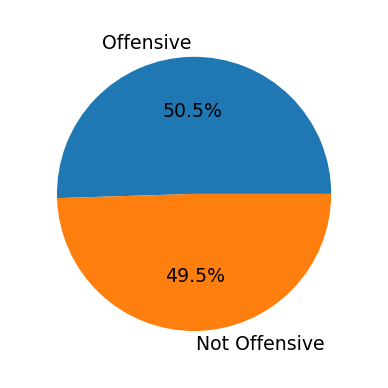

In [ ]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[num_offensive, num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

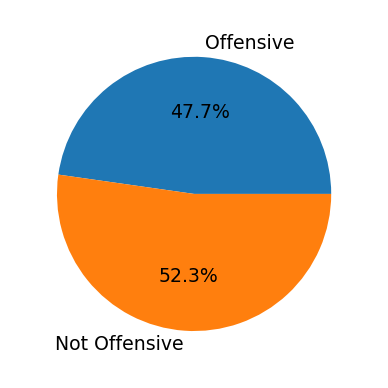

In [ ]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[val_num_offensive, val_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

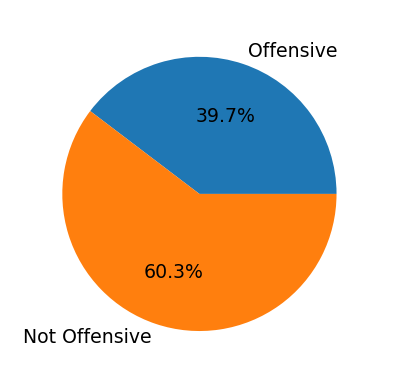

In [ ]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[test_num_offensive, test_num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

#NLP

###Text pre-processing

In [ ]:
st="Is the tweet Offensive or not?"
st.lower()

'is the tweet offensive or not?'

###Download NLTK Resources(Tokenizer & stopwords)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###Tokenize

In [ ]:
word_tokenize(st.lower())

['is', 'the', 'tweet', 'offensive', 'or', 'not', '?']

###Remove stop words. Word stemming

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words:
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens', '?']

###Removing punctuations

In [ ]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words and word.isalpha():
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens']

###Create a function for cleaning tweets

In [ ]:
def clean_tweets(tweet, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
  words=word_tokenize(tweet.lower())
  filtered_words=[]
  for word in words:
    if word not in stop_words and word.isalpha():
      stemmed_word=stemmer.stem(word)
      filtered_words.append(stemmed_word)
  return filtered_words

In [ ]:
clean_tweets(st)

['tweet', 'offens']

In [ ]:
len(df)
type(df.TWEET[0:5])

pandas.core.series.Series

In [ ]:
# %%time
tweetsList=df.TWEET
nestedList=tweetsList.apply(clean_tweets)
nestedList[0:5]

1    [see, ppl, walk, crutch, make, realli, excit, ...
2    [look, girl, broken, smile, ask, want, stay, l...
3         [rememb, buy, book, onlin, servicewithasmil]
4                           [band, wear, cloth, karma]
5    [found, etch, sketch, app, oldschool, notoldsc...
Name: TWEET, dtype: object

In [ ]:
# %%time
val_tweetsList=val_df.TWEET
val_nestedList=val_tweetsList.apply(clean_tweets)
val_nestedList[0:5]

1    [nba, player, ny, support, protest, polic, mon...
2    [new, year, mani, peopl, came, mani, alway, wa...
3    [obama, taxpay, fund, cost, attend, polit, fun...
4        [ca, wait, work, dream, team, today, delilyf]
5                [rt, place, get, stuck, traffic, jam]
Name: TWEET, dtype: object

In [ ]:
# %%time
test_tweetsList=test_df.TWEET
test_nestedList=test_tweetsList.apply(clean_tweets)
test_nestedList[0:5]

1    [u, help, conserv, need, tsu, get, paid, post,...
2    [walk, starbuck, ask, tall, blond, hahahaha, i...
3                                       [gon, na, win]
4                      [exactli, sort, person, weirdo]
5    [much, sarcasm, work, mate, bore, dead, mate, ...
Name: TWEET, dtype: object

In [ ]:
# %%time
flatList=[item for subitem in nestedList for item in subitem]
len(flatList)

20235

In [ ]:
# %%time
val_flatList=[item for subitem in val_nestedList for item in subitem]
len(val_flatList)

6713

In [ ]:
# %%time
test_flatList=[item for subitem in test_nestedList for item in subitem]
len(test_flatList)

6011

In [ ]:
tw_id_offensive=df[df.CATEGORY==1].index
tw_id_non_offensive=df[df.CATEGORY==0].index

val_tw_id_offensive=val_df[val_df.CATEGORY==1].index
val_tw_id_non_offensive=val_df[val_df.CATEGORY==0].index

test_tw_id_offensive=test_df[test_df.CATEGORY==1].index
test_tw_id_non_offensive=test_df[test_df.CATEGORY==0].index

In [ ]:
tw_nested_off=nestedList.loc[tw_id_offensive]
tw_nested_non_off=nestedList.loc[tw_id_non_offensive]

val_tw_nested_off=val_nestedList.loc[val_tw_id_offensive]
val_tw_nested_non_off=val_nestedList.loc[val_tw_id_non_offensive]

test_tw_nested_off=test_nestedList.loc[test_tw_id_offensive]
test_tw_nested_non_off=test_nestedList.loc[test_tw_id_non_offensive]

In [ ]:
flat_off=[item for subitem in tw_nested_off for item in subitem]
flat_non_off=[item for subitem in tw_nested_non_off for item in subitem]
off_words=pd.Series(flat_off).value_counts()
non_off_words=pd.Series(flat_non_off).value_counts()

# 5 most common words in offensive tweets
off_words[0:5]

love     152
get       93
day       92
great     77
like      73
dtype: int64

In [ ]:
val_flat_off=[item for subitem in val_tw_nested_off for item in subitem]
val_flat_non_off=[item for subitem in val_tw_nested_non_off for item in subitem]
val_off_words=pd.Series(val_flat_off).value_counts()
val_non_off_words=pd.Series(val_flat_non_off).value_counts()

# 5 most common words in offensive tweets
val_off_words[0:5]

love    39
get     31
like    25
day     24
work    22
dtype: int64

In [ ]:
test_flat_off=[item for subitem in test_tw_nested_off for item in subitem]
test_flat_non_off=[item for subitem in test_tw_nested_non_off for item in subitem]
test_off_words=pd.Series(test_flat_off).value_counts()
test_non_off_words=pd.Series(test_flat_non_off).value_counts()

# 5 most common words in offensive tweets
test_off_words[0:5]

ironi      102
sarcasm     93
love        29
work        21
get         21
dtype: int64

In [ ]:
# 5 most common words in non-offensive tweets
non_off_words[0:5]

get     86
like    73
go      69
love    66
one     55
dtype: int64

In [ ]:
# 5 most common words in non-offensive tweets
val_non_off_words[0:5]

day      31
like     25
love     23
would    18
one      18
dtype: int64

In [ ]:
# 5 most common words in non-offensive tweets
test_non_off_words[0:5]

get     28
one     26
like    25
make    22
good    20
dtype: int64

In [ ]:
print("Off ",off_words.shape[0]," non-off ",non_off_words.shape[0])

print("Off ",val_off_words.shape[0]," non-off ",val_non_off_words.shape[0])

print("Off ",test_off_words.shape[0]," non-off ",test_non_off_words.shape[0])

Off  3758  non-off  3941
Off  1778  non-off  1906
Off  1346  non-off  1881


In [ ]:
stemmed_nested_list=df.TWEET.apply(clean_tweets)
flat_stemmed_list=[item for subitem in stemmed_nested_list for item in subitem]
unique_words=pd.Series(flat_stemmed_list).value_counts()
print("Number of unique words ",unique_words.shape[0])
unique_words.head()

Number of unique words  6117


love    218
get     179
like    146
go      138
day     137
dtype: int64

In [ ]:
val_stemmed_nested_list=val_df.TWEET.apply(clean_tweets)
val_flat_stemmed_list=[item for subitem in val_stemmed_nested_list for item in subitem]
val_unique_words=pd.Series(val_flat_stemmed_list).value_counts()
print("Number of unique words ",val_unique_words.shape[0])
val_unique_words.head()

Number of unique words  3066


love    62
day     55
like    50
get     47
ca      35
dtype: int64

In [ ]:
test_stemmed_nested_list=test_df.TWEET.apply(clean_tweets)
test_flat_stemmed_list=[item for subitem in test_stemmed_nested_list for item in subitem]
test_unique_words=pd.Series(test_flat_stemmed_list).value_counts()
print("Number of unique words ",test_unique_words.shape[0])
test_unique_words.head()

Number of unique words  2684


ironi      114
sarcasm    109
get         49
love        47
like        41
dtype: int64

In [ ]:
frequent_words=unique_words[0:VOCAB_SIZE]
frequent_words[0:10]

love     218
get      179
like     146
go       138
day      137
one      105
work     100
time      99
great     92
peopl     91
dtype: int64

In [ ]:
val_frequent_words=val_unique_words[0:VOCAB_SIZE]
val_frequent_words[0:10]

love        62
day         55
like        50
get         47
ca          35
christma    34
go          34
one         34
today       32
work        30
dtype: int64

In [ ]:
test_frequent_words=test_unique_words[0:VOCAB_SIZE]
test_frequent_words[0:10]

ironi      114
sarcasm    109
get         49
love        47
like        41
one         40
day         36
work        33
peopl       32
make        31
dtype: int64

In [ ]:
word_ids=list(range(0,VOCAB_SIZE))
vocab=pd.DataFrame({"VOCAB_WORD":frequent_words.index.values}, index=word_ids)
vocab.index.name="WORD_ID"
vocab.head()

,VOCAB_WORD
WORD_ID,
0,love
1,get
2,like
3,go
4,day


In [ ]:
val_word_ids=list(range(0,VOCAB_SIZE))
val_vocab=pd.DataFrame({"VOCAB_WORD":val_frequent_words.index.values}, index=word_ids)
val_vocab.index.name="WORD_ID"
val_vocab.head()

,VOCAB_WORD
WORD_ID,
0,love
1,day
2,like
3,get
4,ca


In [ ]:
test_word_ids=list(range(0,VOCAB_SIZE))
test_vocab=pd.DataFrame({"VOCAB_WORD":test_frequent_words.index.values}, index=word_ids)
test_vocab.index.name="WORD_ID"
test_vocab.head()

,VOCAB_WORD
WORD_ID,
0,ironi
1,sarcasm
2,get
3,love
4,like


In [ ]:
# saved file

#Generate feature and sparse matrix

###Creating a dataframe with one word per column

In [ ]:
type(stemmed_nested_list)
type(val_stemmed_nested_list)

pandas.core.series.Series

In [ ]:
word_columns_df=pd.DataFrame.from_records(stemmed_nested_list.to_list())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
0,see,ppl,walk,crutch,make,realli,excit,next,week,life,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,look,girl,broken,smile,ask,want,stay,love,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,rememb,buy,book,onlin,servicewithasmil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,band,wear,cloth,karma,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,found,etch,sketch,app,oldschool,notoldschool,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
val_word_columns_df=pd.DataFrame.from_records(val_stemmed_nested_list.to_list())
val_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,nba,player,ny,support,protest,polic,money,donat,colleg,wb,come,None,None,None,None,None,None,None,None
1,new,year,mani,peopl,came,mani,alway,wat,gone,better,None,None,None,None,None,None,None,None,None
2,obama,taxpay,fund,cost,attend,polit,fundrais,lo,angel,san,francisco,None,None,None,None,None,None,None,None
3,ca,wait,work,dream,team,today,delilyf,None,None,None,None,None,None,None,None,None,None,None,None
4,rt,place,get,stuck,traffic,jam,None,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
test_word_columns_df=pd.DataFrame.from_records(test_stemmed_nested_list.to_list())
test_word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,u,help,conserv,need,tsu,get,paid,post,stuff,like,go,None,None,None,None,None,None,None
1,walk,starbuck,ask,tall,blond,hahahaha,ironi,None,None,None,None,None,None,None,None,None,None,None
2,gon,na,win,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,exactli,sort,person,weirdo,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,much,sarcasm,work,mate,bore,dead,mate,full,shit,absolut,sleep,mate,ca,handl,sarcasm,None,None,None


In [ ]:
# features:word_columns_df, labels: df.CATEGORY
word_columns_df.shape
# df.CATEGORY.at[1]

(2862, 78)

In [ ]:
# features:word_columns_df, labels: df.CATEGORY
val_word_columns_df.shape
# val_df.CATEGORY.at[1]

(955, 19)

In [ ]:
# features:word_columns_df, labels: df.CATEGORY
test_word_columns_df.shape
# val_df.CATEGORY.at[1]

(784, 18)

###Create a sparse matrix for the training data

In [ ]:
word_index=pd.Index(vocab.VOCAB_WORD)
type(word_index)

val_word_index=pd.Index(vocab.VOCAB_WORD)
type(val_word_index)

test_word_index=pd.Index(vocab.VOCAB_WORD)
type(test_word_index)

pandas.core.indexes.base.Index

In [ ]:
word_index.get_loc('gun')

560

In [ ]:
def make_sparse_matrix(df, indexed_words, labels):
  nr_rows=df.shape[0]
  nr_cols=df.shape[1]
  word_set=set(indexed_words)
  dict_list=[]

  for i in range(nr_rows):
    for j in range(nr_cols):
      word=df.iat[i,j]
      if word in word_set:
        tw_id=df.index[i]
        word_id=indexed_words.get_loc(word)
        category=labels.at[tw_id+1]
        item={'TWEET_ID': tw_id, 'LABEL':category , 'OCCURENCE':1, 'WORD_ID':word_id}

        dict_list.append(item)
  return pd.DataFrame(dict_list)

In [ ]:
%%time
sparse_train_df=make_sparse_matrix(word_columns_df, word_index, df.CATEGORY)

sparse_val_df=make_sparse_matrix(val_word_columns_df, val_word_index, val_df.CATEGORY)

sparse_test_df=make_sparse_matrix(test_word_columns_df, test_word_index, test_df.CATEGORY)

CPU times: user 5.35 s, sys: 19.9 ms, total: 5.37 s
Wall time: 5.42 s


In [ ]:
sparse_train_df[200:205]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
200,33,1,1,32
201,33,1,1,245
202,33,1,1,331
203,33,1,1,1311
204,33,1,1,1126


In [ ]:
sparse_train_df.shape

(15817, 4)

In [ ]:
sparse_val_df.shape

(4616, 4)

In [ ]:
sparse_test_df.shape

(4307, 4)

In [ ]:
sparse_train_df[-5:]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
15812,2861,1,1,250
15813,2861,1,1,40
15814,2861,1,1,357
15815,2861,1,1,479
15816,2861,1,1,655


###Combine occurences

In [ ]:
train_grouped=sparse_train_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        10      1              1
         14      1              1
         23      1              1
         38      1              1
         51      1              1

In [ ]:
val_grouped=sparse_val_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
val_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        35      1              1
         119     1              1
         185     1              1
         212     1              1
         303     1              1

In [ ]:
test_grouped=sparse_test_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
test_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        1       0              1
         2       0              1
         3       0              1
         19      0              1
         93      0              1

In [ ]:
train_grouped=train_grouped.reset_index()
train_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,10,1,1
1,0,14,1,1
2,0,23,1,1
3,0,38,1,1
4,0,51,1,1


In [ ]:
val_grouped=val_grouped.reset_index()
val_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,35,1,1
1,0,119,1,1
2,0,185,1,1
3,0,212,1,1
4,0,303,1,1


In [ ]:
test_grouped=test_grouped.reset_index()
test_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,1,0,1
1,0,2,0,1
2,0,3,0,1
3,0,19,0,1
4,0,93,0,1


In [ ]:
vocab.at[7,'VOCAB_WORD']

'time'

In [ ]:
df.TWEET[1]

'seeing ppl walking w/ crutches makes me really excited for the next 3 weeks of my life  \n'

In [ ]:
print(train_grouped.shape ,val_grouped.shape, test_grouped.shape)

(15194, 4) (4487, 4) (4177, 4)


###DataFrame to numpy array

In [ ]:
sparse_train_data=train_grouped.to_numpy()
sparse_train_data[:5]

array([[ 0, 10,  1,  1],
       [ 0, 14,  1,  1],
       [ 0, 23,  1,  1],
       [ 0, 38,  1,  1],
       [ 0, 51,  1,  1]])

In [ ]:
sparse_val_data=val_grouped.to_numpy()
sparse_val_data[:5]

array([[  0,  35,   1,   1],
       [  0, 119,   1,   1],
       [  0, 185,   1,   1],
       [  0, 212,   1,   1],
       [  0, 303,   1,   1]])

In [ ]:
sparse_test_data=test_grouped.to_numpy()
sparse_test_data[:5]

array([[ 0,  1,  0,  1],
       [ 0,  2,  0,  1],
       [ 0,  3,  0,  1],
       [ 0, 19,  0,  1],
       [ 0, 93,  0,  1]])

In [ ]:
sparse_train_data[-5:]

array([[2861,  479,    1,    1],
       [2861,  655,    1,    1],
       [2861, 1348,    1,    1],
       [2861, 1601,    1,    1],
       [2861, 1969,    1,    1]])

In [ ]:
sparse_train_data.shape

(15194, 4)

In [ ]:
sparse_val_data.shape

(4487, 4)

In [ ]:
sparse_test_data.shape

(4177, 4)

In [ ]:
print("Number of tweets in the training set : ",np.unique(sparse_train_data[:,0]).size)
print("Number of tweets in the val set : ",np.unique(sparse_val_data[:,0]).size)
print("Number of tweets in the test set : ",np.unique(sparse_test_data[:,0]).size)

Number of tweets in the training set :  2833
Number of tweets in the val set :  936
Number of tweets in the test set :  775


##Full matrix

###Create a dataframe

In [ ]:
column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
column_names[:5]

['TWEET_ID', 'CATEGORY', 0, 1, 2]

In [ ]:
len(column_names)

2002

In [ ]:
index_names=np.unique(sparse_train_data[:,0])
index_names

array([   0,    1,    2, ..., 2859, 2860, 2861])

In [ ]:
full_train_data=pd.DataFrame(index=index_names, columns=column_names)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
full_train_data.fillna(value=0, inplace=True)
full_train_data.head()

,TWEET_ID,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Create a full matrix from sparse matrix

In [ ]:
def make_full_matrix(sparse_matrix, nr_words, tw_idx=0, word_idx=1, cat_idx=2, freq_idx=3):
    column_names=['TWEET_ID']+['CATEGORY']+list(range(0,VOCAB_SIZE))
    tw_id_names=np.unique(sparse_matrix[:,0])
    full_matrix=pd.DataFrame(index=tw_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)

    for i in range(sparse_matrix.shape[0]):
      tw_nr=sparse_matrix[i][tw_idx]
      word_id=sparse_matrix[i][word_idx]
      label=sparse_matrix[i][cat_idx]
      occurence=sparse_matrix[i][freq_idx]

      full_matrix.at[tw_nr, 'TWEET_ID']=tw_nr
      full_matrix.at[tw_nr, 'CATEGORY']=label
      full_matrix.at[tw_nr, word_id]=occurence

    full_matrix.set_index('TWEET_ID', inplace=True)
    return full_matrix

In [ ]:
%%time
full_train_data=make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: user 2.54 s, sys: 73.4 ms, total: 2.62 s
Wall time: 2.61 s


In [ ]:
full_train_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
full_train_data.tail()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2858,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2859,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2860,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# %%time
full_val_data=make_full_matrix(sparse_val_data, nr_words=VOCAB_SIZE)
full_val_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# %%time
full_test_data=make_full_matrix(sparse_test_data, nr_words=VOCAB_SIZE)
full_test_data.head()

,CATEGORY,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_val = full_val_data.loc[:, full_val_data.columns != 'CATEGORY']
y_val = full_val_data.CATEGORY

In [ ]:
X_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY

In [ ]:
print(X_val.shape, y_val.shape, full_val_data.shape, full_train_data.shape, full_test_data.shape)

(936, 2000) (936,) (936, 2001) (2833, 2001) (775, 2001)


#Naive Bayes Model

###Probability of Offensive

In [ ]:
prob_off = full_train_data.CATEGORY.sum()/full_train_data.CATEGORY.size
prob_off

0.505118249205789

###Total number of words/tokens

In [ ]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']
full_train_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tweet_lengths=full_train_features.sum(axis=1)
tweet_lengths.shape

(2833,)

In [ ]:
tweet_lengths[:5]

TWEET_ID
0    9
1    8
2    4
3    3
4    2
dtype: int64

In [ ]:
total_wc=tweet_lengths.sum()
total_wc

15817

###Number of tokens in Offensive and non offensive tweets

In [ ]:
off_lengths=tweet_lengths[full_train_data.CATEGORY==1]
off_lengths.shape

(1431,)

In [ ]:
off_wc=off_lengths.sum()
off_wc

8137

In [ ]:
non_off_lengths=tweet_lengths[full_train_data.CATEGORY==0]
non_off_lengths.shape

(1402,)

In [ ]:
non_off_wc=non_off_lengths.sum()
non_off_wc

7680

In [ ]:
tweet_lengths.shape[0]-off_lengths.shape[0]-non_off_lengths.shape[0]

0

In [ ]:
print("Avg number of words in offensive tweet : ", off_wc/off_lengths.shape[0])
print("Avg number of words in non offensive tweet : ", non_off_wc/non_off_lengths.shape[0])

Avg number of words in offensive tweet :  5.686233403214535
Avg number of words in non offensive tweet :  5.477888730385164


###Summing the tokens in offensive tweets

In [ ]:
full_train_features.shape

(2833, 2000)

In [ ]:
train_off_tokens=full_train_features.loc[full_train_data.CATEGORY==1]
train_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
summed_off_tokens=train_off_tokens.sum(axis=0)+LAPLACE_CONST
summed_off_tokens.shape

(2000,)

###Summing the tokens in non offensive tweets

In [ ]:
train_non_off_tokens=full_train_features.loc[full_train_data.CATEGORY==0]
train_non_off_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
TWEET_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
summed_non_off_tokens=train_non_off_tokens.sum(axis=0)+LAPLACE_CONST
summed_non_off_tokens.shape

(2000,)

###P(token|offensive)

In [ ]:
prob_token_off=summed_off_tokens/(off_wc+(LAPLACE_CONST*VOCAB_SIZE))
prob_token_off[:5]

0    0.017432
1    0.010679
2    0.008390
3    0.007932
4    0.010564
dtype: float64

In [ ]:
prob_token_off.sum()

1.0000000000000002

###P(token|not offensive)

In [ ]:
prob_token_non_off=summed_non_off_tokens/(non_off_wc+(LAPLACE_CONST*VOCAB_SIZE))
prob_token_non_off[:5]

0    0.008007
1    0.010423
2    0.008853
3    0.008370
4    0.005471
dtype: float64

In [ ]:
prob_token_non_off.sum()

1.0

###P(token)

In [ ]:
prob_tokens_all=full_train_features.sum(axis=0)/total_wc

In [ ]:
prob_tokens_all.sum()

1.0000000000000002

###Set the Prior

$$P(Off \, | \, X) = \frac{P(X \, | \, Off) \, P(Off)} {P(X)}$$

In [ ]:
prob_off

0.505118249205789

In [ ]:
X_val=X_val.to_numpy()
y_val=y_val.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
prob_token_off=prob_token_off.to_numpy()
prob_token_non_off=prob_token_non_off.to_numpy()
prob_tokens_all=prob_tokens_all.to_numpy()

In [ ]:
np.log(prob_token_off)
prob_token_off.shape

(2000,)

###Joint probability in log format

In [ ]:
joint_log_off_val = X_val.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [ ]:
joint_log_off_test = X_test.dot(np.log(prob_token_off) - np.log(prob_tokens_all)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off) - np.log(prob_tokens_all)) + np.log(1-prob_off)

In [ ]:
joint_log_off_val[:5]

array([ 0.35464741, -0.90185788, -0.08248935, -0.61533239, -0.97609147])

In [ ]:
joint_log_off_val.size

936

In [ ]:
joint_log_non_off_val[:5]

array([-1.9087991 , -1.43140846, -2.23080164, -2.18067028, -0.77831411])

In [ ]:
joint_log_non_off_val.size

936

In [ ]:
joint_log_non_off_test.size

775

# Making Predictions

### Checking for the higher joint probability

$$P(Off \, | \, X) \, > \, P(NonOff \, | \, X)$$
<center>**OR**</center>
<br>
$$P(Off \, | \, X) \, < \, P(NonOff \, | \, X)$$

In [ ]:
# prediction_val = joint_log_off_val > joint_log_non_off_val

In [ ]:
prediction_test = joint_log_off_test > joint_log_non_off_test

In [ ]:
# prediction_val[-5:]*1

In [ ]:
# y_val.size

In [ ]:
# y_val[-5:]*1

In [ ]:
prediction_test[15:20]*1

array([1, 0, 0, 0, 0])

In [ ]:
y_test[15:20]

array([0, 0, 0, 0, 1])

###Simplify

In [ ]:
joint_log_off_val = X_val.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_val = X_val.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [ ]:
joint_log_off_test = X_test.dot(np.log(prob_token_off)) + np.log(prob_off)
joint_log_non_off_test = X_test.dot(np.log(prob_token_non_off)) + np.log(1-prob_off)

In [ ]:
# correct_tweets_val = (y_val == prediction_val).sum()
# print('Val tweets classified correctly', correct_tweets_val)
# numTweets_wrong_val = X_val.shape[0] - correct_tweets_val
# print('Val tweets classified incorrectly', numTweets_wrong_val)

#Result

In [ ]:
correct_tweets_test = (y_test == prediction_test).sum()
print('Test tweets classified correctly', correct_tweets_test)
numTweets_wrong_test = X_test.shape[0] - correct_tweets_test
print('Test tweets classified incorrectly', numTweets_wrong_test)

Test tweets classified correctly 502
Test tweets classified incorrectly 273


In [ ]:
# correct_tweets_val/len(X_val)

In [ ]:
correct_tweets_test/len(X_test)

0.6477419354838709

In [ ]:
print("Accuracy on test set : ",round(correct_tweets_test/len(X_test)*100,2),"%")

Accuracy on test set :  64.77 %


In [ ]:
round(f1_score(y_true=y_test, y_pred=prediction_test),2)

0.64